In [18]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv("data/ASML_v1.csv")
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,obv,ma6,ma10,rsi6,rsi10,macd,dif,atr10,atr20,bias6,bias10,tapi
0,0,2016-11-17,101.239998,102.849998,101.190002,102.559998,97.645622,1344700,1344700,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,13111.349710
1,1,2016-11-18,103.580002,104.750000,103.379997,104.589996,99.578346,1914300,3259000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,18302.897726
2,2,2016-11-21,104.089996,105.110001,104.019997,105.089996,100.054390,1408200,4667200,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,13399.943416
3,3,2016-11-22,105.449997,105.610001,104.800003,105.320000,100.273384,876300,5543500,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,8320.357007
4,4,2016-11-23,104.480003,105.349998,104.250000,105.099998,100.063911,432300,5111200,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,4113.225578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,2021-11-10,829.609985,835.440002,815.109985,817.849976,817.849976,737700,86884600,840.889994,829.088001,43.364854,51.307540,14.121893,4.518819,19.559911,20.038150,-3.840003,-1.123802,901.999171
1254,1254,2021-11-11,833.270020,839.039978,829.200012,833.390015,833.390015,416000,87300600,841.451660,831.108002,55.059322,57.428905,13.815968,3.370316,19.722920,20.095742,-1.343608,0.228201,499.166048
1255,1255,2021-11-12,840.000000,855.000000,835.099976,851.630005,851.630005,531200,87831800,841.641663,834.983002,65.184828,63.425384,14.873879,3.542582,19.911627,20.171455,1.664724,1.664700,623.745050
1256,1256,2021-11-15,855.000000,861.599976,852.989990,856.719971,856.719971,638000,88469800,843.261658,839.909998,67.627289,64.955921,15.939261,3.686371,18.917461,19.661380,2.243052,1.680997,744.700744


## Feature selection

https://scikit-learn.org/stable/modules/feature_selection.html

In [20]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0)
sel.fit_transform(df.drop(["Date"],axis=1))

array([[0.00000000e+00, 1.01239998e+02, 1.02849998e+02, ...,
                   nan,            nan, 1.31113497e+04],
       [1.00000000e+00, 1.03580002e+02, 1.04750000e+02, ...,
                   nan,            nan, 1.83028977e+04],
       [2.00000000e+00, 1.04089996e+02, 1.05110001e+02, ...,
                   nan,            nan, 1.33999434e+04],
       ...,
       [1.25500000e+03, 8.40000000e+02, 8.55000000e+02, ...,
        1.66472369e+00, 1.66470031e+00, 6.23745050e+02],
       [1.25600000e+03, 8.55000000e+02, 8.61599976e+02, ...,
        2.24305217e+00, 1.68099732e+00, 7.44700744e+02],
       [1.25700000e+03, 8.51520020e+02, 8.62609985e+02, ...,
        2.58638847e+00, 1.57869934e+00, 8.01812805e+02]])

## Feature ranking

# (PCA)

In [21]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'obv', 'ma6', 'ma10', 'rsi6', 'rsi10', 'macd', 'dif', 'atr10',
       'atr20', 'bias6', 'bias10', 'tapi'],
      dtype='object')

In [24]:
df.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)

In [25]:
df.dropna(inplace=True)

In [26]:
X_meaned = df - np.mean(df , axis = 0)

In [27]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)

In [28]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [29]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]


In [30]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data

#you can select any number of components.

In [31]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [32]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [33]:
X_reduced.shape

(1225, 2)

Text(0, 0.5, 'PC2')

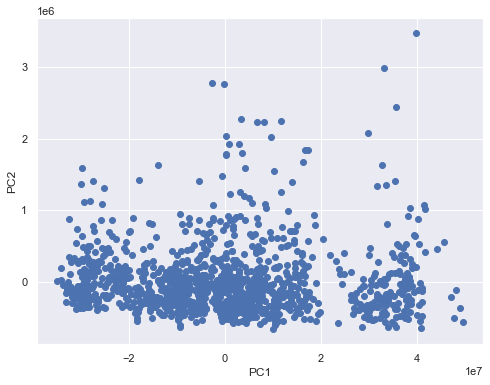

In [34]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('PC1')
plt.ylabel('PC2')

## K-means clustering

In [111]:
pc1 = "Volume"
pc2 = 'tapi'#"dif"
pc_lst = [pc1,pc2]
df_pc = df[[pc1,pc2]]

In [112]:
df_pc

,Volume,tapi
33,360200,3241.540589
34,554800,4931.994043
35,816100,7244.562677
36,419900,3700.211393
37,713900,6220.266783
...,...,...
1253,737700,901.999171
1254,416000,499.166048
1255,531200,623.745050
1256,638000,744.700744


In [113]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3) # TODO: n?
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_pc)
 
print(label)

[1 1 1 ... 1 1 1]


In [114]:
df_pc[label == 0]

,Volume,tapi
40,4392000,35716.028009
41,1936700,15892.827705
63,3895800,30533.741846
64,2312100,18671.565555
87,2238000,16865.109650
103,3355400,26443.376361
104,2259500,17374.086489
140,1941400,15040.284861
153,1988500,15343.363487
166,2528800,16788.155852


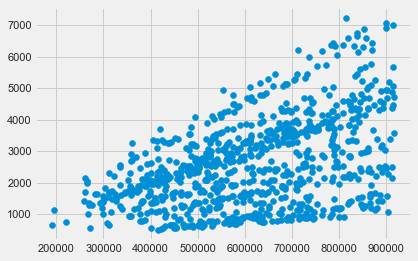

In [115]:
import matplotlib.pyplot as plt
#filter rows of original data
filtered_label0 = df_pc[label == 1]
#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.show()

In [116]:
u_labels

array([0, 1, 2])

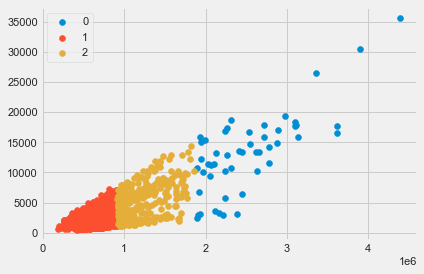

In [117]:
# Visualize all the clusters
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_pc.iloc[label == i , 0] , df_pc.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

In [118]:
## Comment: 1. how dow we interprete the kmeans plot 2. what is the objective func if we use archeological method to choose k

In [123]:
# Choosing k using elbow method
# https://realpython.com/k-means-clustering-python/
kmeans_kwargs = { 
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_pc)
    sse.append(kmeans.inertia_)

C:\Users\vayne\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


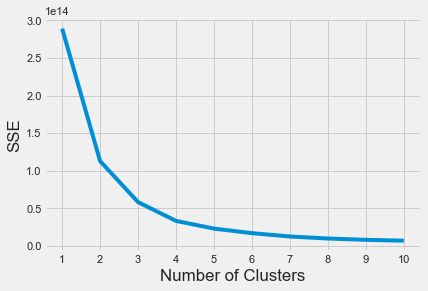

In [124]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [127]:
from kneed import  KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3